In [5]:
import glob
import zipfile
# Import libraries
import pandas as pd
import seaborn as sb
import numpy as np
import plotly.express as px
import statsmodels.api as sm
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from scipy.stats import norm
import scipy.stats as stats
import missingno as msno
from sklearn.preprocessing import RobustScaler
from sklearn import linear_model
import sklearn.model_selection as ms
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor 
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge, Lasso
from category_encoders import BinaryEncoder
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [6]:
zf = zipfile.ZipFile("data.zip")


In [7]:
dfs = [pd.read_csv(zf.open(f), sep=",") for f in zf.namelist()]


In [8]:
historical=dfs[0]
new=dfs[2]
merchant=dfs[1]
score=dfs[3]

In [11]:
historical

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-8,-0.703331,2017-06-25 15:33:07,1.0,16,37
1,Y,C_ID_4e6213e9bc,88,N,0,A,367,M_ID_86ec983688,-7,-0.733128,2017-07-15 12:10:45,1.0,16,16
2,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_979ed661fc,-6,-0.720386,2017-08-09 22:04:29,1.0,16,37
3,Y,C_ID_4e6213e9bc,88,N,0,A,560,M_ID_e6d5ae8ea6,-5,-0.735352,2017-09-02 10:06:26,1.0,16,34
4,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-11,-0.722865,2017-03-10 01:14:19,1.0,16,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29112356,Y,C_ID_2863d2fa95,-1,Y,1,B,360,M_ID_edd92b6720,-1,-0.632706,2017-01-20 08:52:04,NaN,-1,34
29112357,Y,C_ID_2863d2fa95,-1,Y,1,B,360,M_ID_edd92b6720,0,-0.632706,2017-02-20 04:40:50,NaN,-1,34
29112358,Y,C_ID_5c240d6e3c,3,N,0,A,278,M_ID_9cdcfe8673,0,-0.657740,2017-12-26 18:37:51,1.0,16,37
29112359,Y,C_ID_5c240d6e3c,331,N,0,A,514,M_ID_1a75f94f92,-1,0.770620,2017-11-24 14:18:15,1.0,16,9


In [12]:
new

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_415bb3a509,107,N,1,B,307,M_ID_b0c793002c,1,-0.557574,2018-03-11 14:57:36,1.0,9,19
1,Y,C_ID_415bb3a509,140,N,1,B,307,M_ID_88920c89e8,1,-0.569580,2018-03-19 18:53:37,1.0,9,19
2,Y,C_ID_415bb3a509,330,N,1,B,507,M_ID_ad5237ef6b,2,-0.551037,2018-04-26 14:08:44,1.0,9,14
3,Y,C_ID_415bb3a509,-1,Y,1,B,661,M_ID_9e84cda3b1,1,-0.671925,2018-03-07 09:43:21,NaN,-1,8
4,Y,C_ID_ef55cf8d4b,-1,Y,1,B,166,M_ID_3c86fa3831,1,-0.659904,2018-03-22 21:07:53,NaN,-1,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1963026,Y,C_ID_1320dee851,142,N,0,A,309,M_ID_7754b67f3b,2,-0.701828,2018-04-06 14:36:52,3.0,19,21
1963027,Y,C_ID_f112aa3381,158,N,0,A,560,M_ID_da063195b7,2,-0.694390,2018-03-07 13:19:18,1.0,15,34
1963028,Y,C_ID_bd97b86450,69,N,1,B,278,M_ID_9a9ccb6544,1,-0.621031,2018-03-05 12:04:56,1.0,9,37
1963029,Y,C_ID_c0513fd84f,130,N,0,A,367,M_ID_40c28d596f,1,-0.656749,2018-03-09 14:47:05,3.0,7,16


In [9]:
#removing negatives from month lag
historical["month_lag"]=abs(historical["month_lag"])
new_and_his=pd.concat([historical, new],ignore_index = True)
new_and_his

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,8,-0.703331,2017-06-25 15:33:07,1.0,16,37
1,Y,C_ID_4e6213e9bc,88,N,0,A,367,M_ID_86ec983688,7,-0.733128,2017-07-15 12:10:45,1.0,16,16
2,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_979ed661fc,6,-0.720386,2017-08-09 22:04:29,1.0,16,37
3,Y,C_ID_4e6213e9bc,88,N,0,A,560,M_ID_e6d5ae8ea6,5,-0.735352,2017-09-02 10:06:26,1.0,16,34
4,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,11,-0.722865,2017-03-10 01:14:19,1.0,16,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31075387,Y,C_ID_1320dee851,142,N,0,A,309,M_ID_7754b67f3b,2,-0.701828,2018-04-06 14:36:52,3.0,19,21
31075388,Y,C_ID_f112aa3381,158,N,0,A,560,M_ID_da063195b7,2,-0.694390,2018-03-07 13:19:18,1.0,15,34
31075389,Y,C_ID_bd97b86450,69,N,1,B,278,M_ID_9a9ccb6544,1,-0.621031,2018-03-05 12:04:56,1.0,9,37
31075390,Y,C_ID_c0513fd84f,130,N,0,A,367,M_ID_40c28d596f,1,-0.656749,2018-03-09 14:47:05,3.0,7,16


In [14]:
merchant

,merchant_id,merchant_group_id,merchant_category_id,subsector_id,numerical_1,numerical_2,category_1,most_recent_sales_range,most_recent_purchases_range,avg_sales_lag3,...,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,category_4,city_id,state_id,category_2
0,M_ID_838061e48c,8353,792,9,-0.057471,-0.057471,N,E,E,-0.40,...,-2.25,18.666667,6,-2.32,13.916667,12,N,242,9,1.0
1,M_ID_9339d880ad,3184,840,20,-0.057471,-0.057471,N,E,E,-0.72,...,-0.74,1.291667,6,-0.57,1.687500,12,N,22,16,1.0
2,M_ID_e726bbae1e,447,690,1,-0.057471,-0.057471,N,E,E,-82.13,...,-82.13,260.000000,2,-82.13,260.000000,2,N,-1,5,5.0
3,M_ID_a70e9c5f81,5026,792,9,-0.057471,-0.057471,Y,E,E,NaN,...,NaN,4.666667,6,NaN,3.833333,12,Y,-1,-1,NaN
4,M_ID_64456c37ce,2228,222,21,-0.057471,-0.057471,Y,E,E,NaN,...,NaN,0.361111,6,NaN,0.347222,12,Y,-1,-1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334691,M_ID_1f4773aa76,1145,705,33,3.174788,-0.047556,N,A,A,1.00,...,0.99,1.019505,6,1.00,1.024796,12,Y,69,9,1.0
334692,M_ID_725a60d404,35,544,29,-0.057471,-0.057471,Y,A,A,0.89,...,0.78,0.813473,6,0.59,0.606765,12,Y,-1,-1,NaN
334693,M_ID_f2045dd267,35,561,7,-0.057471,-0.057471,N,A,A,0.96,...,0.90,0.924769,6,0.74,0.750763,8,Y,160,21,5.0
334694,M_ID_9139332ccc,35,511,7,-0.057471,-0.057471,Y,A,A,0.94,...,0.82,0.783000,6,0.65,0.584000,12,Y,-1,-1,NaN


merchant data set doesn't have the same shape or features as the previous two datasets but we we can use some columns in common i.e merchant id, state id , city id, subsector id,merchant category id, category 1, category 2.

i used all these keys to avoid any duplicates

In [10]:
new_his_mer=pd.merge(new_and_his, merchant,on=["merchant_id", "state_id" , "city_id", "subsector_id","merchant_category_id", "category_1", "category_2"],how="inner")
new_his_mer

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,...,avg_sales_lag3,avg_purchases_lag3,active_months_lag3,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,category_4
0,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,8,-0.703331,...,1.08,1.082451,3,1.14,1.114135,6,1.19,1.156844,12,Y
1,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,11,-0.722865,...,1.08,1.082451,3,1.14,1.114135,6,1.19,1.156844,12,Y
2,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,8,-0.741649,...,1.08,1.082451,3,1.14,1.114135,6,1.19,1.156844,12,Y
3,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,6,-0.745405,...,1.08,1.082451,3,1.14,1.114135,6,1.19,1.156844,12,Y
4,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,6,-0.737892,...,1.08,1.082451,3,1.14,1.114135,6,1.19,1.156844,12,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20289039,Y,C_ID_cf615e2bb8,296,N,0,A,68,M_ID_16a7d71c54,2,-0.686802,...,1.20,1.055556,3,2.20,1.527778,6,2.10,1.638889,12,N
20289040,Y,C_ID_2747b3a8ec,212,N,-1,NaN,34,M_ID_d1f0c32fe8,1,-0.228493,...,1.69,1.333333,3,2.67,2.333333,6,3.03,2.555556,12,Y
20289041,Y,C_ID_729db768e1,261,N,0,A,273,M_ID_7ebe45f784,2,-0.731881,...,0.49,0.727273,3,0.52,0.606061,6,0.48,0.621212,12,N
20289042,Y,C_ID_09f3c45b34,296,N,0,A,278,M_ID_ca64cb9e56,2,-0.671925,...,1.07,0.904762,3,1.23,1.007937,6,1.30,1.075397,12,N


time to merge the score dataset using Card id as our primary key

In [11]:
df = pd.merge(new_his_mer, score, on="card_id" , how="inner")
df

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,...,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,category_4,first_active_month,feature_1,feature_2,feature_3,score
0,Y,C_ID_d244d8976d,88,N,0,A,80,M_ID_e020e9b302,4,-0.713098,...,6,1.19,1.156844,12,Y,Aug-17,3,2,1,-0.168948
1,Y,C_ID_d244d8976d,69,N,0,A,278,M_ID_f86439cec0,0,-0.699694,...,6,1.13,1.125829,12,Y,Aug-17,3,2,1,-0.168948
2,Y,C_ID_d244d8976d,69,N,0,A,705,M_ID_1f4773aa76,5,-0.684488,...,6,1.00,1.024796,12,Y,Aug-17,3,2,1,-0.168948
3,Y,C_ID_d244d8976d,69,N,0,A,705,M_ID_1f4773aa76,0,-0.665855,...,6,1.00,1.024796,12,Y,Aug-17,3,2,1,-0.168948
4,Y,C_ID_d244d8976d,69,N,0,A,705,M_ID_1f4773aa76,5,-0.695893,...,6,1.00,1.024796,12,Y,Aug-17,3,2,1,-0.168948
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12563647,Y,C_ID_191dcf4f8b,116,N,0,A,419,M_ID_ebfea682eb,2,-0.716855,...,6,0.57,0.655303,12,N,Dec-17,3,1,1,-0.742585
12563648,Y,C_ID_e814936231,293,N,0,A,307,M_ID_a396a4f84e,2,-0.596643,...,6,0.29,0.437255,6,N,Oct-16,3,1,1,0.826023
12563649,Y,C_ID_9be25c5f29,157,N,1,B,45,M_ID_f2c6ed1e33,2,-0.656749,...,6,1.42,1.777778,12,N,Dec-17,5,1,1,0.268295
12563650,Y,C_ID_295d3d1968,246,N,0,A,511,M_ID_60cddec486,2,0.004418,...,6,0.96,1.023810,12,Y,Nov-17,3,2,1,-1.054437


# Q1:
1- since both historical and new_merchant have the same type of features i will use them the same way
the most important features i see that can affect customer loyality are:
a) "month_lag" since it represents how frequent is the customer with his purchases
b)"authorized_flag" can tell me if a customer completes his purchase
c) "category 1,2 & 3"
d)"purchase amount"
f)"state id" since it represents  a location and can be used as categorical feature
i won't be using other location ids since it doesn't really affect the accuracy

2- merchant data set has a few useful features for our analysis especialy the avg colums since they have extremly high correlation

## Data Exploration

In [17]:
df.describe(include='all')

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,...,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,category_4,first_active_month,feature_1,feature_2,feature_3,score
count,12563652,12563652,1.256365e+07,12563652,1.256365e+07,12476244,1.256365e+07,12563652,1.256365e+07,1.256365e+07,...,1.256365e+07,1.255785e+07,1.256365e+07,1.256365e+07,12563652,12563652,1.256365e+07,1.256365e+07,1.256365e+07,1.256365e+07
unique,2,193619,NaN,2,NaN,3,NaN,207449,NaN,NaN,...,NaN,NaN,NaN,NaN,2,75,NaN,NaN,NaN,NaN
top,Y,C_ID_0cd2ce025c,NaN,N,NaN,A,NaN,M_ID_e5374dabc0,NaN,NaN,...,NaN,NaN,NaN,NaN,Y,Jan-17,NaN,NaN,NaN,NaN
freq,11577679,2548,NaN,11565790,NaN,6529318,NaN,267515,NaN,NaN,...,NaN,NaN,NaN,NaN,7251100,805024,NaN,NaN,NaN,NaN
mean,NaN,NaN,1.225711e+02,NaN,6.402080e-01,NaN,4.614522e+02,NaN,4.327856e+00,2.456488e-01,...,5.996990e+00,6.726357e+01,inf,1.193341e+01,NaN,NaN,3.099102e+00,1.733425e+00,5.406364e-01,-4.649742e-01
std,NaN,NaN,9.600395e+01,NaN,2.518455e+00,NaN,2.409172e+02,NaN,3.552624e+00,1.701168e+03,...,9.525070e-02,7.522398e+03,NaN,5.272832e-01,NaN,NaN,1.267184e+00,7.138124e-01,4.983460e-01,3.605745e+00
min,NaN,NaN,-1.000000e+00,NaN,-1.000000e+00,NaN,2.000000e+00,NaN,0.000000e+00,-7.469078e-01,...,1.000000e+00,-2.320000e+00,9.832954e-02,1.000000e+00,NaN,NaN,1.000000e+00,1.000000e+00,0.000000e+00,-3.321928e+01
25%,NaN,NaN,5.300000e+01,NaN,0.000000e+00,NaN,2.780000e+02,NaN,1.000000e+00,-7.213627e-01,...,6.000000e+00,9.500000e-01,9.716296e-01,1.200000e+01,NaN,NaN,2.000000e+00,1.000000e+00,0.000000e+00,-8.066553e-01
50%,NaN,NaN,8.800000e+01,NaN,0.000000e+00,NaN,4.370000e+02,NaN,3.000000e+00,-6.903480e-01,...,6.000000e+00,1.040000e+00,1.052381e+00,1.200000e+01,NaN,NaN,3.000000e+00,2.000000e+00,1.000000e+00,-9.086313e-02
75%,NaN,NaN,1.890000e+02,NaN,1.000000e+00,NaN,7.050000e+02,NaN,7.000000e+00,-6.089644e-01,...,6.000000e+00,1.160000e+00,1.154022e+00,1.200000e+01,NaN,NaN,4.000000e+00,2.000000e+00,1.000000e+00,5.339889e-01


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12563652 entries, 0 to 12563651
Data columns (total 34 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   authorized_flag              object 
 1   card_id                      object 
 2   city_id                      int64  
 3   category_1                   object 
 4   installments                 int64  
 5   category_3                   object 
 6   merchant_category_id         int64  
 7   merchant_id                  object 
 8   month_lag                    int64  
 9   purchase_amount              float64
 10  purchase_date                object 
 11  category_2                   float64
 12  state_id                     int64  
 13  subsector_id                 int64  
 14  merchant_group_id            int64  
 15  numerical_1                  float64
 16  numerical_2                  float64
 17  most_recent_sales_range      object 
 18  most_recent_purchases_range  object 
 19

there are too many id columns that we won't need

In [12]:
#Dropping the id columns
df.drop(columns=["card_id","merchant_category_id","merchant_id","subsector_id","merchant_group_id"],inplace=True)

In [13]:
# correlation analysis
num_data = df.select_dtypes(include=['int', 'float'])
corr = num_data.corr()
corr.style.background_gradient(cmap='gist_heat')

,city_id,installments,month_lag,purchase_amount,category_2,state_id,numerical_1,numerical_2,avg_sales_lag3,avg_purchases_lag3,active_months_lag3,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,feature_1,feature_2,feature_3,score
city_id,1.000000,-0.047914,0.011451,-0.000123,0.035044,0.151519,-0.090955,-0.089406,-0.005053,-0.006244,-0.006762,-0.004154,-0.008975,-0.003992,-0.003104,-0.011396,0.018178,0.022312,0.017751,0.057192,0.018930
installments,-0.047914,1.000000,-0.003327,-0.000048,0.001250,-0.069833,-0.017494,-0.017478,-0.000230,0.001210,-0.001329,-0.000183,0.004766,-0.001658,-0.000129,0.008120,-0.004009,-0.009599,-0.070862,-0.089307,-0.010526
month_lag,0.011451,-0.003327,1.000000,-0.000075,-0.000341,0.016670,0.009100,0.009037,0.011536,0.011594,-0.005756,0.011408,0.011678,-0.011249,0.010677,0.011698,0.030282,0.048779,0.051109,0.052590,0.022271
purchase_amount,-0.000123,-0.000048,-0.000075,1.000000,-0.000195,-0.000061,-0.000063,-0.000062,-0.000004,-0.000004,-0.000001,-0.000004,-0.000004,0.000006,-0.000004,-0.000003,0.000024,-0.000006,-0.000283,0.000252,0.000041
category_2,0.035044,0.001250,-0.000341,-0.000195,1.000000,0.184048,-0.123530,-0.121440,-0.007492,-0.007479,-0.009261,-0.007449,-0.007499,-0.008128,-0.006965,-0.007583,-0.022255,-0.034752,0.125087,-0.015407,0.005865
state_id,0.151519,-0.069833,0.016670,-0.000061,0.184048,1.000000,-0.014648,-0.014558,-0.002440,-0.004015,-0.008094,-0.002384,-0.007862,-0.005065,-0.002227,-0.011439,-0.017265,-0.002025,0.092349,0.048606,0.018922
numerical_1,-0.090955,-0.017494,0.009100,-0.000063,-0.123530,-0.014648,1.000000,0.999475,-0.002018,-0.002207,0.003195,-0.002021,-0.002731,0.006822,-0.001899,-0.003204,0.027266,-0.014979,-0.022605,-0.000161,0.000112
numerical_2,-0.089406,-0.017478,0.009037,-0.000062,-0.121440,-0.014558,0.999475,1.000000,-0.001981,-0.002165,0.003137,-0.001984,-0.002680,0.006698,-0.001864,-0.003145,0.026771,-0.014565,-0.022136,0.000363,0.000074
avg_sales_lag3,-0.005053,-0.000230,0.011536,-0.000004,-0.007492,-0.002440,-0.002018,-0.001981,1.000000,0.996134,0.000137,0.960782,0.996018,0.000116,0.868885,0.995759,-0.051190,0.000570,0.001688,0.000408,-0.001456
avg_purchases_lag3,-0.006244,0.001210,0.011594,-0.000004,-0.007479,-0.004015,-0.002207,-0.002165,0.996134,1.000000,0.000135,0.942339,0.994796,0.000097,0.842173,0.980140,-0.051393,0.000573,0.001638,0.000132,-0.001487


there appears to be a multicollinearity between all active and avg columns except for  "active_months_lag12" as expected so we will drop these columns so that they won't affect the accuracy and, the 2 numerical columns are almost identical so we will remove one of them also

In [14]:
df.drop(columns=["numerical_2","avg_sales_lag3","avg_purchases_lag3","active_months_lag3","avg_sales_lag6","avg_purchases_lag6","active_months_lag6","avg_sales_lag12"],inplace=True)

In [22]:
# checking correlation after drop
num_data = df.select_dtypes(include=['int', 'float'])
corr = num_data.corr()
corr.style.background_gradient(cmap='gist_heat')

,city_id,installments,month_lag,purchase_amount,category_2,state_id,numerical_1,avg_purchases_lag12,active_months_lag12,feature_1,feature_2,feature_3,score
city_id,1.000000,-0.047914,0.011451,-0.000123,0.035044,0.151519,-0.090955,-0.011396,0.018178,0.022312,0.017751,0.057192,0.018930
installments,-0.047914,1.000000,-0.003327,-0.000048,0.001250,-0.069833,-0.017494,0.008120,-0.004009,-0.009599,-0.070862,-0.089307,-0.010526
month_lag,0.011451,-0.003327,1.000000,-0.000075,-0.000341,0.016670,0.009100,0.011698,0.030282,0.048779,0.051109,0.052590,0.022271
purchase_amount,-0.000123,-0.000048,-0.000075,1.000000,-0.000195,-0.000061,-0.000063,-0.000003,0.000024,-0.000006,-0.000283,0.000252,0.000041
category_2,0.035044,0.001250,-0.000341,-0.000195,1.000000,0.184048,-0.123530,-0.007583,-0.022255,-0.034752,0.125087,-0.015407,0.005865
state_id,0.151519,-0.069833,0.016670,-0.000061,0.184048,1.000000,-0.014648,-0.011439,-0.017265,-0.002025,0.092349,0.048606,0.018922
numerical_1,-0.090955,-0.017494,0.009100,-0.000063,-0.123530,-0.014648,1.000000,-0.003204,0.027266,-0.014979,-0.022605,-0.000161,0.000112
avg_purchases_lag12,-0.011396,0.008120,0.011698,-0.000003,-0.007583,-0.011439,-0.003204,1.000000,-0.050049,0.000460,0.001267,-0.001298,-0.001508
active_months_lag12,0.018178,-0.004009,0.030282,0.000024,-0.022255,-0.017265,0.027266,-0.050049,1.000000,0.003550,0.000168,0.004534,-0.001805
feature_1,0.022312,-0.009599,0.048779,-0.000006,-0.034752,-0.002025,-0.014979,0.000460,0.003550,1.000000,-0.109271,0.582312,-0.004358


will need to do correlation analysis again after encoding the categorical features

In [23]:
df.head()

,authorized_flag,city_id,category_1,installments,category_3,month_lag,purchase_amount,purchase_date,category_2,state_id,...,most_recent_sales_range,most_recent_purchases_range,avg_purchases_lag12,active_months_lag12,category_4,first_active_month,feature_1,feature_2,feature_3,score
0,Y,88,N,0,A,4,-0.713098,2017-10-27 20:41:25,1.0,16,...,A,A,1.156844,12,Y,Aug-17,3,2,1,-0.168948
1,Y,69,N,0,A,0,-0.699694,2018-02-02 12:39:34,1.0,9,...,A,A,1.125829,12,Y,Aug-17,3,2,1,-0.168948
2,Y,69,N,0,A,5,-0.684488,2017-09-13 23:15:53,1.0,9,...,A,A,1.024796,12,Y,Aug-17,3,2,1,-0.168948
3,Y,69,N,0,A,0,-0.665855,2018-02-23 19:20:07,1.0,9,...,A,A,1.024796,12,Y,Aug-17,3,2,1,-0.168948
4,Y,69,N,0,A,5,-0.695893,2017-09-20 23:43:11,1.0,9,...,A,A,1.024796,12,Y,Aug-17,3,2,1,-0.168948


In [24]:
df["category_1"].value_counts()

category_1
N    11565790
Y      997862
Name: count, dtype: int64

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12563652 entries, 0 to 12563651
Data columns (total 21 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   authorized_flag              object 
 1   city_id                      int64  
 2   category_1                   object 
 3   installments                 int64  
 4   category_3                   object 
 5   month_lag                    int64  
 6   purchase_amount              float64
 7   purchase_date                object 
 8   category_2                   float64
 9   state_id                     int64  
 10  numerical_1                  float64
 11  most_recent_sales_range      object 
 12  most_recent_purchases_range  object 
 13  avg_purchases_lag12          float64
 14  active_months_lag12          int64  
 15  category_4                   object 
 16  first_active_month           object 
 17  feature_1                    int64  
 18  feature_2                    int64  
 19


## Handling missing Values 

In [26]:
df.isna().sum()

authorized_flag                      0
city_id                              0
category_1                           0
installments                         0
category_3                       87408
month_lag                            0
purchase_amount                      0
purchase_date                        0
category_2                     1186777
state_id                             0
numerical_1                          0
most_recent_sales_range              0
most_recent_purchases_range          0
avg_purchases_lag12                  0
active_months_lag12                  0
category_4                           0
first_active_month                   0
feature_1                            0
feature_2                            0
feature_3                            0
score                                0
dtype: int64

there appears to be only 2 columns with missing values

sometimes missing values in numerical data are represented as -1 so we will check for that and handle them

In [27]:
df[num_data==-1].sum()

authorized_flag                        0
city_id                       -1186777.0
category_1                             0
installments                    -87408.0
category_3                             0
month_lag                            0.0
purchase_amount                      0.0
purchase_date                          0
category_2                           0.0
state_id                      -1186777.0
numerical_1                          0.0
most_recent_sales_range                0
most_recent_purchases_range            0
avg_purchases_lag12                  0.0
active_months_lag12                  0.0
category_4                             0
first_active_month                     0
feature_1                            0.0
feature_2                            0.0
feature_3                            0.0
score                            -1665.0
dtype: object

In [15]:
df["installments"]=df["installments"].replace(-1,np.nan)
df["city_id"]=df["city_id"].replace(-1,np.nan)
df["state_id"]=df["state_id"].replace(-1,np.nan)

In [29]:
df.isna().sum()

authorized_flag                      0
city_id                        1186777
category_1                           0
installments                     87408
category_3                       87408
month_lag                            0
purchase_amount                      0
purchase_date                        0
category_2                     1186777
state_id                       1186777
numerical_1                          0
most_recent_sales_range              0
most_recent_purchases_range          0
avg_purchases_lag12                  0
active_months_lag12                  0
category_4                           0
first_active_month                   0
feature_1                            0
feature_2                            0
feature_3                            0
score                                0
dtype: int64

<Axes: >

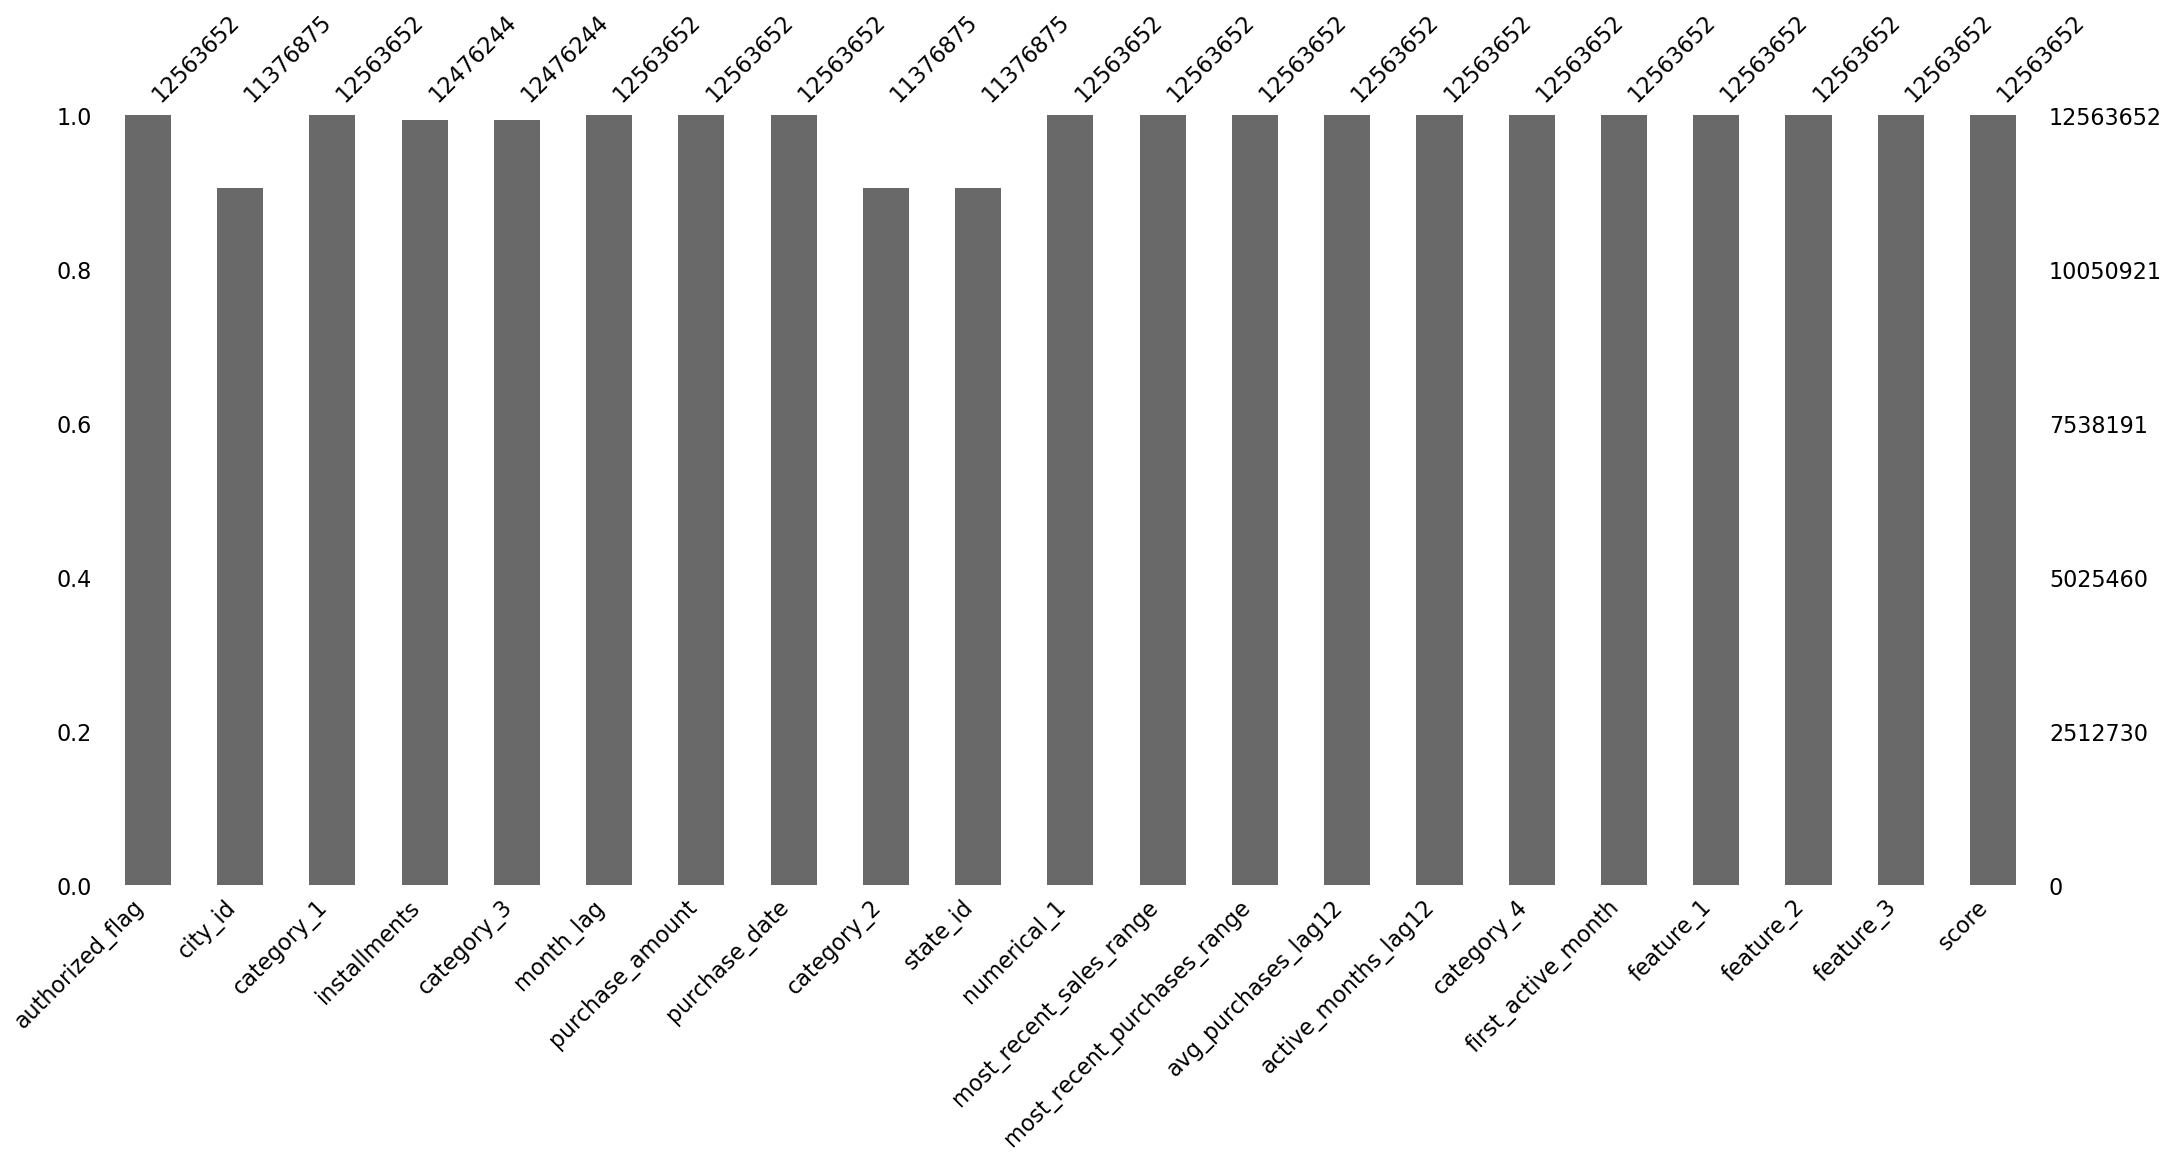

In [30]:
msno.bar(df)

<Axes: >

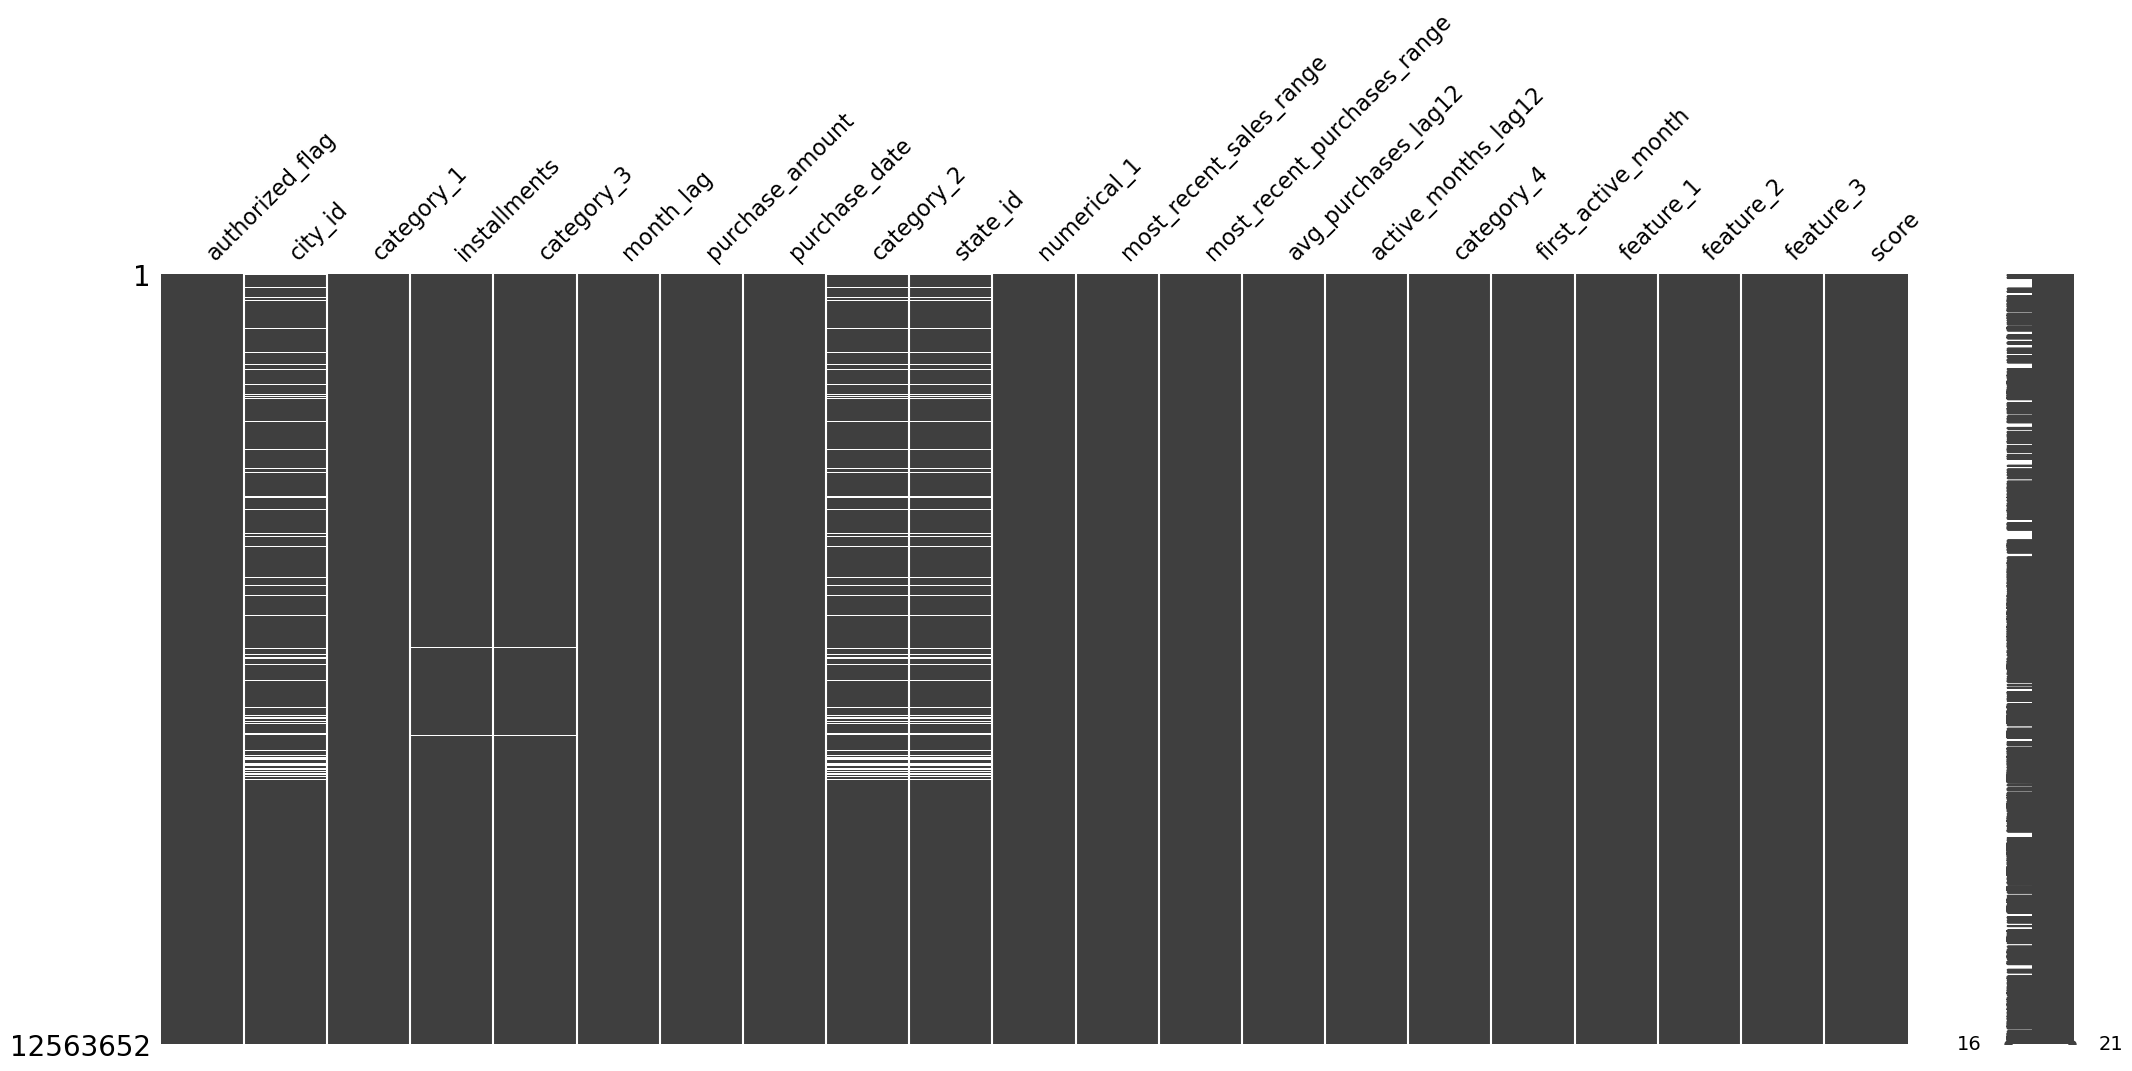

In [31]:
msno.matrix(df)

# Q2
we now have 5 columns with missing values

Pattern of missing data: General Pattern

category_3 and Installments are missing at random(MAR)

city_id, state_id and category_2 are missing at random(MAR)

there are some columns with errors like installments that have values of -1 which doesn't make sense

some categorical columns were labeled as int or float

# Q3 
## filling missing values

In [16]:
#filling the missing values with most frequent value
df['category_3'].fillna(df['category_3'].mode()[0], inplace=True)
df['category_2'].fillna(df['category_2'].mode()[0], inplace=True)
df["installments"].fillna(df["installments"].mode()[0],inplace=True)
df["city_id"].fillna(df["city_id"].mode()[0],inplace=True)
df["state_id"].fillna(df["state_id"].mode()[0],inplace=True)

In [17]:

#will change this too since it's category
df["category_2"]=df["category_2"].astype("object")
df["city_id"]=df["city_id"].astype("object")
df["state_id"]=df["state_id"].astype("object")
#first active month contains 0 value wich doesn't match format
df["first_active_month"]=df["first_active_month"].str.replace("0",df["first_active_month"].mode()[0])
df["purchase_date"]=df["purchase_date"].replace(0,"2017-11-25 00:00:00")


In [18]:
df['first_active_month']= pd.to_datetime(df['first_active_month'],format='%b-%y')
df['purchase_date']= pd.to_datetime(df['purchase_date'])

In [19]:
df['first_active_month']=df['first_active_month'].dt.year
df['first_active_month']=df['first_active_month'].astype('object')
df['purchase_date']=df['purchase_date'].dt.year
df['purchase_date']=df['purchase_date'].astype('object')


In [36]:
df.isna().sum()

authorized_flag                0
city_id                        0
category_1                     0
installments                   0
category_3                     0
month_lag                      0
purchase_amount                0
purchase_date                  0
category_2                     0
state_id                       0
numerical_1                    0
most_recent_sales_range        0
most_recent_purchases_range    0
avg_purchases_lag12            0
active_months_lag12            0
category_4                     0
first_active_month             0
feature_1                      0
feature_2                      0
feature_3                      0
score                          0
dtype: int64

# Q4
## Normality test
#### graph test

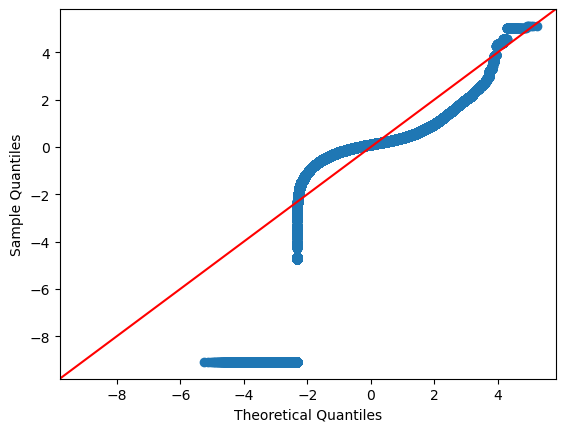

/tmp/ipykernel_89/2200765324.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(X, fit=norm, ax=axes[0])


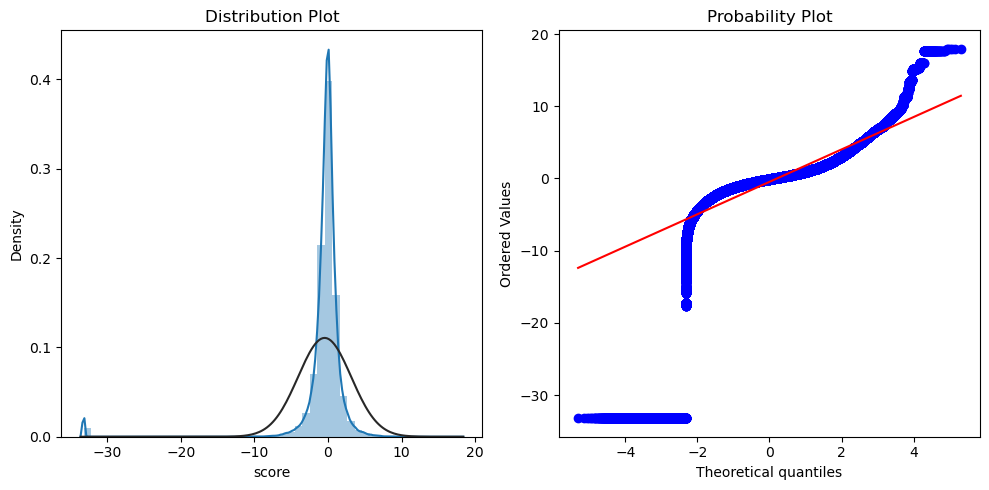

In [37]:
#Q-Q plot with 45-degree line added to plot
fig = sm.qqplot(df['score'], line='45', fit = True)
plt.show()


# Probplot and distribution plot
def normality_plot(X):

    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    sb.distplot(X, fit=norm, ax=axes[0])
    axes[0].set_title('Distribution Plot')

    axes[1] = stats.probplot((X), plot=plt)
    plt.tight_layout()

normality_plot(df['score'])


### Statistical test

In [38]:
# Shapiro-wilk test
w, pvalue = stats.shapiro(df['score']) #p value obtained from the Shapiro-Wilk test is significant (p < 0.05), we conclude that the data is not normally distribute
print("p = {:g}".format(pvalue))

p = 0


/opt/conda/lib/python3.9/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


we conclude from the graph test and statistical test that the data is not normaly distributed

# Q5 
## Hypothesis Test
the two Questions i chose are

" do customers with with more than 6 months of installment have more loyality score than customers with less than 6 months?"( i asked this question because having long installment duration means more affiliation with the seller , thus it might affect the loyality)

"do customers with higher than 5 months lag have less loyality score than customers with lower than 5 months lag?" (there might be customers that make one purchase frome the seller but never again and there are some regualr customers that have low lag)

In [39]:
"""do customers with with more than 6 months of installment have more loyality score than customers with less than 6 months?"""
# the null hypothesis will be that there isn't a change in loyality
high = df.loc[df['installments'] > 6]['score']
low = df.loc[df['installments'] <=6 ]['score']

stats.mannwhitneyu(x=high, y=low, alternative = 'greater')


'do customers with with more than 6 months of installment have more loyality score than customers with less than 6 months?'

MannwhitneyuResult(statistic=537840144232.0, pvalue=2.866002862491649e-24)

p value is significant so we will reject the null hypothesis

In [40]:
"""do customers with higher than 5 months lag have less loyality score than customers with lower than 5 months lag?"""
# the null hypothesis will be that there isn't a change in loyality
high = df.loc[df['month_lag'] > 5]['score']
low = df.loc[df['month_lag'] <=5 ]['score']

stats.mannwhitneyu(x=high, y=low, alternative = 'less')

'do customers with higher than 5 months lag have less loyality score than customers with lower than 5 months lag?'

MannwhitneyuResult(statistic=18098820661718.0, pvalue=1.0)

p value is not significant this means it failed to reject the null hypothesis

### Remove outliers

In [20]:
def cap_data(df):
    for col in df.columns:
        print("capping the ",col)
        if (((df[col].dtype)=='float64') | ((df[col].dtype)=='int64')):
            percentiles = df[col].quantile([0.01,0.99]).values
            df[col][df[col] <= percentiles[0]] = percentiles[0]
            df[col][df[col] >= percentiles[1]] = percentiles[1]
        else:
            df[col]=df[col]
    return df

final_df=cap_data(df)

capping the  authorized_flag
capping the  city_id
capping the  category_1
capping the  installments
capping the  category_3


/tmp/ipykernel_95/2644200493.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][df[col] <= percentiles[0]] = percentiles[0]
/tmp/ipykernel_95/2644200493.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][df[col] >= percentiles[1]] = percentiles[1]


capping the  month_lag


/tmp/ipykernel_95/2644200493.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][df[col] <= percentiles[0]] = percentiles[0]
/tmp/ipykernel_95/2644200493.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][df[col] >= percentiles[1]] = percentiles[1]


capping the  purchase_amount


/tmp/ipykernel_95/2644200493.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][df[col] <= percentiles[0]] = percentiles[0]
/tmp/ipykernel_95/2644200493.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][df[col] >= percentiles[1]] = percentiles[1]


capping the  purchase_date
capping the  category_2
capping the  state_id
capping the  numerical_1
capping the  most_recent_sales_range
capping the  most_recent_purchases_range


/tmp/ipykernel_95/2644200493.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][df[col] <= percentiles[0]] = percentiles[0]
/tmp/ipykernel_95/2644200493.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][df[col] >= percentiles[1]] = percentiles[1]


capping the  avg_purchases_lag12
capping the  active_months_lag12


/tmp/ipykernel_95/2644200493.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][df[col] <= percentiles[0]] = percentiles[0]
/tmp/ipykernel_95/2644200493.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][df[col] >= percentiles[1]] = percentiles[1]
/tmp/ipykernel_95/2644200493.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][df[col] <= percentiles[0]] = percentiles[0]
/tmp/ipykernel_95/2644200493.py:7: Setti

capping the  category_4
capping the  first_active_month
capping the  feature_1
capping the  feature_2


/tmp/ipykernel_95/2644200493.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][df[col] <= percentiles[0]] = percentiles[0]
/tmp/ipykernel_95/2644200493.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][df[col] >= percentiles[1]] = percentiles[1]
/tmp/ipykernel_95/2644200493.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][df[col] <= percentiles[0]] = percentiles[0]
/tmp/ipykernel_95/2644200493.py:7: Setti

capping the  feature_3
capping the  score


/tmp/ipykernel_95/2644200493.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][df[col] <= percentiles[0]] = percentiles[0]
/tmp/ipykernel_95/2644200493.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][df[col] >= percentiles[1]] = percentiles[1]
/tmp/ipykernel_95/2644200493.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][df[col] <= percentiles[0]] = percentiles[0]
/tmp/ipykernel_95/2644200493.py:7: Setti

In [21]:
# split the data into train and test set
train, test = train_test_split(final_df, test_size=0.2, shuffle=True, random_state=123)

X_train = train.drop(['score'], axis=1)
X_test  = test.drop(['score'], axis=1)
y_train = train['score']
y_test = test['score']


In [22]:
#feature scaling
numerical_cols = list(df.select_dtypes(exclude=['object']).columns)
#for sale_price and sale_price_log, we do not want to scale them
numerical_cols = numerical_cols[:-1]
scaler = RobustScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])

X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

In [23]:
#mapping categorical data for X_train
X_train['most_recent_sales_range'] = X_train['most_recent_sales_range'].map({'A': 5, 'B': 4, 'C': 3, 'D': 2, 'E': 1})
X_train['most_recent_purchases_range'] = X_train['most_recent_purchases_range'].map({'A': 5, 'B': 4, 'C': 3, 'D': 2, 'E': 1})
X_train['authorized_flag'] = X_train['authorized_flag'].map({'N': 0, 'Y': 1})
X_train['category_3'] = X_train['category_3'].map({'A': 2, 'B': 1, 'C': 0})
X_train['category_4'] = X_train['category_4'].map({'N': 0, 'Y': 1})
X_train['category_1'] = X_train['category_1'].map({'N': 0, 'Y': 1})

#mapping categorical data for X_train
X_test['most_recent_sales_range'] = X_test['most_recent_sales_range'].map({'A': 5, 'B': 4, 'C': 3, 'D': 2, 'E': 1})
X_test['most_recent_purchases_range'] = X_test['most_recent_purchases_range'].map({'A': 5, 'B': 4, 'C': 3, 'D': 2, 'E': 1})
X_test['authorized_flag'] = X_test['authorized_flag'].map({'N': 0, 'Y': 1})
X_test['category_3'] = X_test['category_3'].map({'A': 2, 'B': 1, 'C': 0})
X_test['category_4'] = X_test['category_4'].map({'N': 0, 'Y': 1})
X_test['category_1'] = X_test['category_1'].map({'N': 0, 'Y': 1})




# Q6
i will use the 3 reggression models used in the past lab (Base Linear reggression, Ridge, Lasso)

After removing features with multi colleanarity and unecessary columns i've ended up with 20 features that i think would be important for this task

In [45]:
#display used features
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10050921 entries, 4028804 to 4967934
Data columns (total 20 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   authorized_flag              int64  
 1   city_id                      object 
 2   category_1                   int64  
 3   installments                 float64
 4   category_3                   int64  
 5   month_lag                    float64
 6   purchase_amount              float64
 7   purchase_date                object 
 8   category_2                   object 
 9   state_id                     object 
 10  numerical_1                  float64
 11  most_recent_sales_range      int64  
 12  most_recent_purchases_range  int64  
 13  avg_purchases_lag12          float64
 14  active_months_lag12          float64
 15  category_4                   int64  
 16  first_active_month           object 
 17  feature_1                    float64
 18  feature_2                    float64
 19

we will use binary encoder for the rest of the categorical features

In [24]:
cat_cols= list(X_train.select_dtypes(exclude=['float64',"int64"]))
X_train[cat_cols]

,city_id,purchase_date,category_2,state_id,first_active_month
4028804,69.0,2017,1.0,9.0,2017
8601963,69.0,2018,1.0,9.0,2017
6395404,97.0,2017,3.0,3.0,2017
7021722,52.0,2017,4.0,4.0,2016
7913500,69.0,2017,1.0,9.0,2017
...,...,...,...,...,...
1241052,69.0,2018,1.0,9.0,2016
11552066,17.0,2018,4.0,22.0,2017
4222334,69.0,2017,1.0,9.0,2015
8666477,69.0,2018,1.0,9.0,2015


In [25]:
encoder = BinaryEncoder(cols=cat_cols)

# Apply the encoder to the data
binary_train = encoder.fit_transform(X_train)
binary_test = encoder.transform(X_test)
#list all new column names
encoded_col = binary_train.columns[:].tolist()
#add new data
X_train[encoded_col]= binary_train
X_test[encoded_col]= binary_test
encoded_train=X_train.drop(columns=cat_cols)
encoded_test=X_test.drop(columns=cat_cols)


In [26]:
corr = encoded_train.corr()
corr.style.background_gradient(cmap='gist_heat')

,authorized_flag,category_1,installments,category_3,month_lag,purchase_amount,numerical_1,most_recent_sales_range,most_recent_purchases_range,avg_purchases_lag12,active_months_lag12,category_4,feature_1,feature_2,feature_3,city_id_0,city_id_1,city_id_2,city_id_3,city_id_4,city_id_5,city_id_6,city_id_7,city_id_8,purchase_date_0,purchase_date_1,category_2_0,category_2_1,category_2_2,state_id_0,state_id_1,state_id_2,state_id_3,state_id_4,first_active_month_0,first_active_month_1,first_active_month_2,first_active_month_3
authorized_flag,1.000000,-0.190503,-0.081634,0.064331,-0.026515,-0.077749,0.008255,-0.044095,-0.025966,0.010952,-0.003128,-0.039309,-0.031996,-0.012271,-0.057194,0.001451,0.013772,0.021616,0.029727,0.036396,0.050438,0.038116,0.036192,-0.045259,0.041133,-0.041133,0.026928,0.024378,-0.033680,0.010076,0.032976,0.033110,0.024047,-0.043482,-0.001026,-0.009461,-0.008280,0.004033
category_1,-0.190503,1.000000,0.292114,-0.306896,-0.016893,0.074932,-0.067746,0.281565,0.229385,-0.150328,-0.004142,0.251395,-0.027276,-0.105941,-0.099370,-0.025187,-0.114761,-0.157623,-0.171171,-0.199178,-0.253289,-0.228154,-0.216580,0.248666,0.005523,-0.005523,-0.123182,-0.160672,0.170435,-0.116710,-0.137135,-0.201921,-0.145464,0.227349,0.001131,-0.001909,-0.050616,0.055940
installments,-0.081634,0.292114,1.000000,-0.874449,-0.017975,0.449060,-0.045087,0.061672,-0.037115,-0.018369,-0.006557,0.082166,-0.028185,-0.186168,-0.236580,-0.007580,-0.038568,-0.033329,-0.048819,-0.054998,-0.079222,-0.087653,-0.075010,0.086766,0.014067,-0.014067,-0.038826,-0.047238,0.033055,-0.014381,-0.059751,-0.056299,-0.067382,0.062531,0.002375,-0.021095,-0.138454,0.145833
category_3,0.064331,-0.306896,-0.874449,1.000000,0.035555,-0.286328,0.041318,-0.074075,0.004505,0.038962,0.006372,-0.093575,0.052052,0.254141,0.321348,0.007052,0.045403,0.034685,0.052986,0.061617,0.086884,0.102196,0.085127,-0.094927,-0.025643,0.025643,0.041469,0.060598,-0.040770,0.020055,0.067948,0.060226,0.080944,-0.065830,-0.002489,0.027775,0.185419,-0.192791
month_lag,-0.026515,-0.016893,-0.017975,0.035555,1.000000,0.001557,0.009708,0.003502,0.006039,0.046512,0.046705,-0.016312,0.048842,0.051098,0.052620,0.002027,0.008408,0.008218,0.010235,0.011126,0.010881,0.012334,0.014809,-0.017757,-0.537183,0.537183,0.000337,0.005380,0.002127,0.002412,0.006077,0.007094,0.005519,-0.005252,0.002234,0.052109,0.287088,-0.257400
purchase_amount,-0.077749,0.074932,0.449060,-0.286328,0.001557,1.000000,-0.054829,0.022667,-0.126843,0.016335,-0.007306,0.008924,0.072278,-0.066350,-0.038605,0.002131,-0.002183,0.001256,-0.003288,-0.013062,-0.026089,-0.020647,-0.020472,0.025374,0.006457,-0.006457,-0.001623,0.005187,-0.010385,0.010594,-0.009860,-0.016142,-0.005913,0.015160,-0.001174,-0.019664,-0.021269,0.027121
numerical_1,0.008255,-0.067746,-0.045087,0.041318,0.009708,-0.054829,1.000000,0.279520,0.271989,0.010873,0.033014,0.184228,-0.015800,-0.022336,-0.000372,-0.018955,-0.086022,-0.108035,-0.114141,-0.123307,-0.130270,-0.098831,-0.125215,0.103399,-0.017681,0.017681,-0.070729,-0.077398,0.094649,-0.064975,-0.063977,-0.077769,-0.074461,0.083849,-0.000346,-0.000477,0.003125,-0.001992
most_recent_sales_range,-0.044095,0.281565,0.061672,-0.074075,0.003502,0.022667,0.279520,1.000000,0.898539,-0.251484,0.056619,0.323310,-0.017810,-0.037679,-0.037892,-0.048989,-0.194263,-0.176602,-0.180746,-0.167454,-0.119253,-0.117460,-0.150395,0.120651,-0.017068,0.017068,-0.078436,-0.050709,0.079097,-0.065005,-0.047714,-0.073775,-0.066736,0.067268,0.000114,0.000193,-0.011253,0.012387
most_recent_purchases_range,-0.025966,0.229385,-0.037115,0.004505,0.006039,-0.126843,0.271989,0.898539,1.000000,-0.258575,0.062157,0.303297,-0.032998,-0.023039,-0.020419,-0.050104,-0.192288,-0.171119,-0.168779,-0.151302,-0.100199,-0.105498,-0.131877,0.103232,-0.021389,0.021389,-0.077547,-0.057740,0.087092,-0.068317,-0.047259,-0.065613,-0.066725,0.067274,0.000242,0.004427,-0.003731,0.003922
avg_purchases_lag12,0.010952,-0.150328,-0.018369,0.038962,0.046512,0.016335,0

# Q7
### Answer: multicollinearity does exist in selected features
this was the second i did a correlation analysis and discovered after encoding categorical features that there are two columns with high correlation so we will drop those

In [28]:
#removing high colinearity feature
encoded_train.drop(columns=["most_recent_sales_range"],inplace=True)
encoded_test.drop(columns=["most_recent_sales_range"],inplace=True)

In [27]:
def rmse(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))


def train_test(model):
    print(model)
    model.fit(encoded_train.values, y_train.values)
    print("RMSE train: {}".format(rmse(y_train.values, model.predict(encoded_train.values))))
    print("RMSE test : {}".format(rmse(y_test.values,  model.predict(encoded_test.values))))


    plt.scatter(y_test, model.predict(encoded_test.values), s=5 )
    plt.xlabel('Real Score')
    plt.ylabel('Predicted Score')
    plt.title( "Real vs Predicted Loyality Score")
    plt.show()

    plt.scatter( y_test,model.predict(encoded_test.values)-y_test, s=5)
    plt.xlabel('Real Score')
    plt.ylabel('Residual')
    plt.title( "Residuals vs Real")
    plt.show()

def residual_plots(encoded_train, encoded_test, Y_train, Y_test, Predicted_Y_train, Predicted_Y_test):
    interested_attribute_groups = ['']


# Q8
### training and testing model then measuring performance

LinearRegression()
RMSE train: 1.9612847483569005
RMSE test : 1.957955430148978


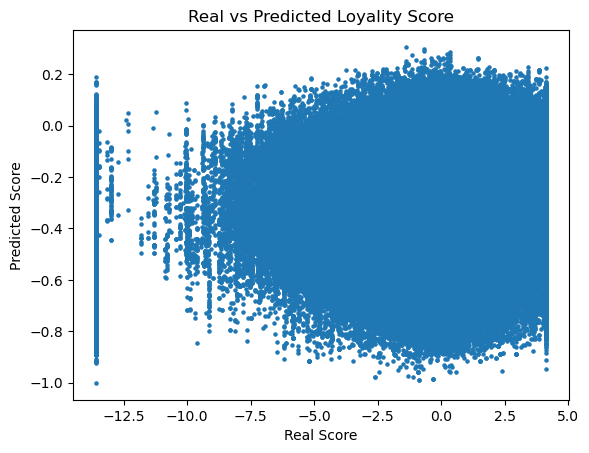

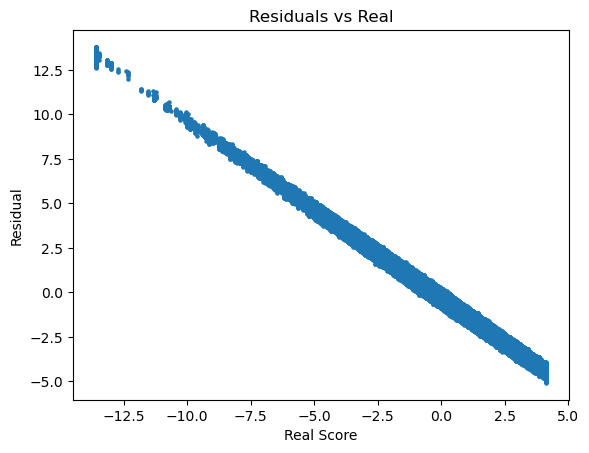

Ridge(alpha=20.0)
RMSE train: 1.9612847484268972
RMSE test : 1.9579554254407066


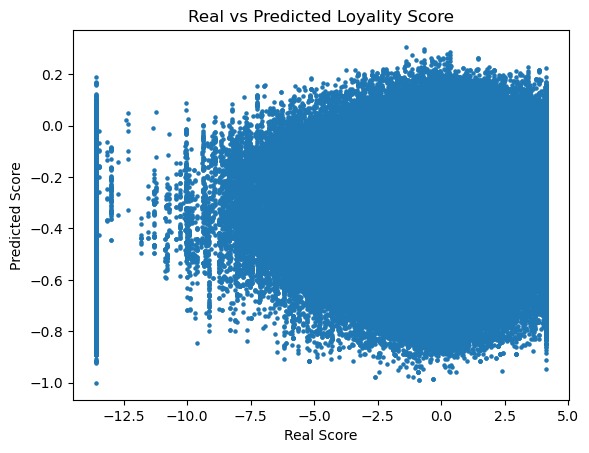

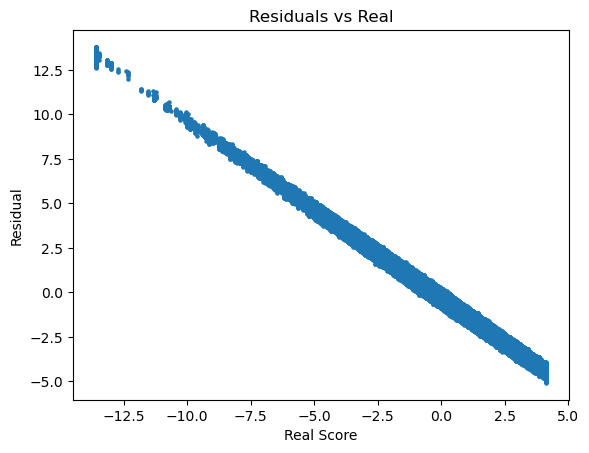

Lasso(alpha=0.0006, max_iter=500000)
RMSE train: 1.961313834439225
RMSE test : 1.957976352748013


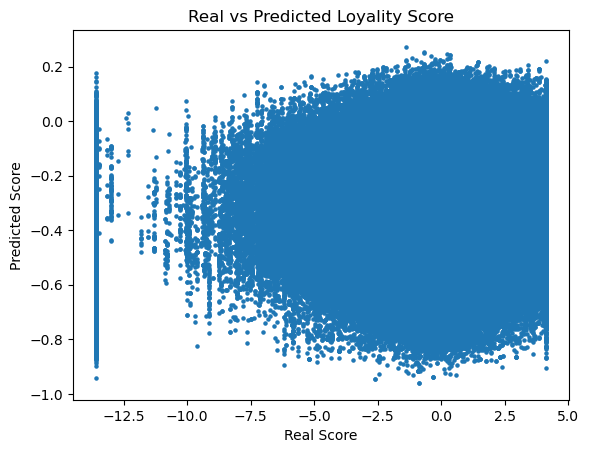

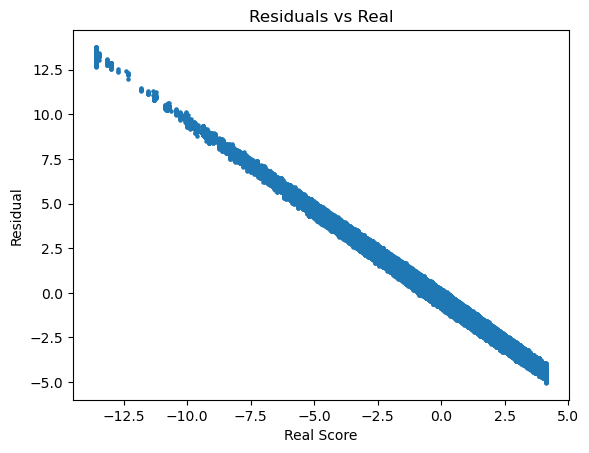

In [29]:
# a multiple linear regression model
model_base = linear_model.LinearRegression()

# With Ridge and Lasso
lambda_list_ridge = list(np.linspace(20, 25, 101))
model_ridge = Ridge(alpha=lambda_list_ridge[0])

lambda_list_lasso = list(np.linspace(0.0006, 0.0007, 11))
model_lasso = Lasso(alpha=lambda_list_lasso[0], max_iter=500000)

for model in [model_base, model_ridge,model_lasso]:
    train_test(model)

Findings: all models had a similar root mean square error of 1.961 on train data and 1.957 on test data